# Principal Component Analysis (PCA) 
is a popular dimensionality reduction technique used in data analysis and machine learning. It transforms high-dimensional data into a lower-dimensional form while retaining as much of the original data's variability as possible. PCA achieves this by identifying the directions, or principal components, along which the variation in the data is the greatest.

### Key Considerations:
- PCA is sensitive to the scaling of features. Features should be standardized (e.g., using z-scores) to ensure they contribute equally to the analysis.
- It is a linear method, meaning it works well for datasets where the relationships between variables are linear.
- PCA assumes that the components with the most variance are the most informative, which may not always be true in all cases.
- By identifying the key components of variance in the data, PCA simplifies complex datasets, making it a valuable tool for exploratory data analysis, visualization, and model building.

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [75]:
filename = "cleaned_dataset.csv"

df = pd.read_csv(filename)

print(df.columns)
print(df.dtypes)

Index(['is_clean', 'product_name', 'brand_name', 'size', 'loves_count',
       'number_of_reviews', 'rating', 'secondary_category',
       'tertiary_category', 'ingredients', 'ingredient_description',
       'limited_edition', 'online_only', 'sephora_exclusive', 'list_price'],
      dtype='object')
is_clean                    int64
product_name               object
brand_name                 object
size                      float64
loves_count                 int64
number_of_reviews           int64
rating                    float64
secondary_category         object
tertiary_category          object
ingredients                object
ingredient_description     object
limited_edition             int64
online_only                 int64
sephora_exclusive           int64
list_price                float64
dtype: object


# 2 component PCA (all numerical)

In [76]:
# selecting numerical data
numerical_columns = ['size', 'loves_count', 'number_of_reviews', 'rating', 'list_price']
numerical_data = df[numerical_columns]
print(numerical_data)

      size  loves_count  number_of_reviews  rating  list_price
0     0.15        22871                397  4.3401        20.0
1     1.00         6596                240  4.6792        32.0
2     0.30         5015                232  4.4310        19.0
3     0.29         4978                103  4.6117        22.0
4     0.14         3685                 19  4.0526        22.0
...    ...          ...                ...     ...         ...
1189  0.30        30837               3024  4.2004        32.0
1190  0.10        23332               1964  4.5229        48.0
1191  0.50        14056                335  4.1910        29.0
1192  1.35        12600                261  4.4904        39.0
1193  0.80         7764                198  4.4949        39.0

[1194 rows x 5 columns]


In [77]:
# normalize/standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [78]:
# apply PCA using sklearn
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

In [79]:
# exploring varience
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance) * 100

print("Explained Variance Ratio: ", explained_variance)

Explained Variance Ratio:  [0.3404509  0.22762701]


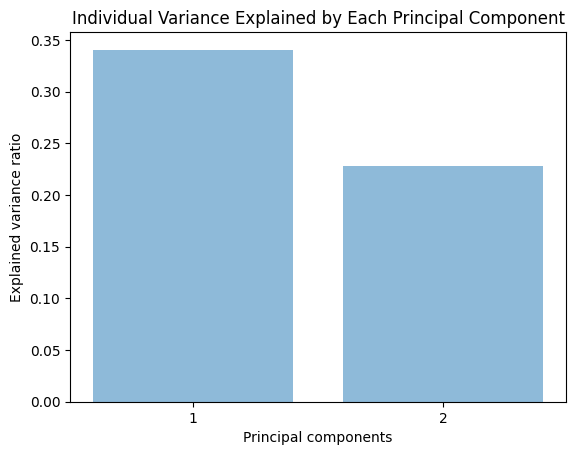

In [80]:
# visualization of explained varience
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(False)
plt.show()

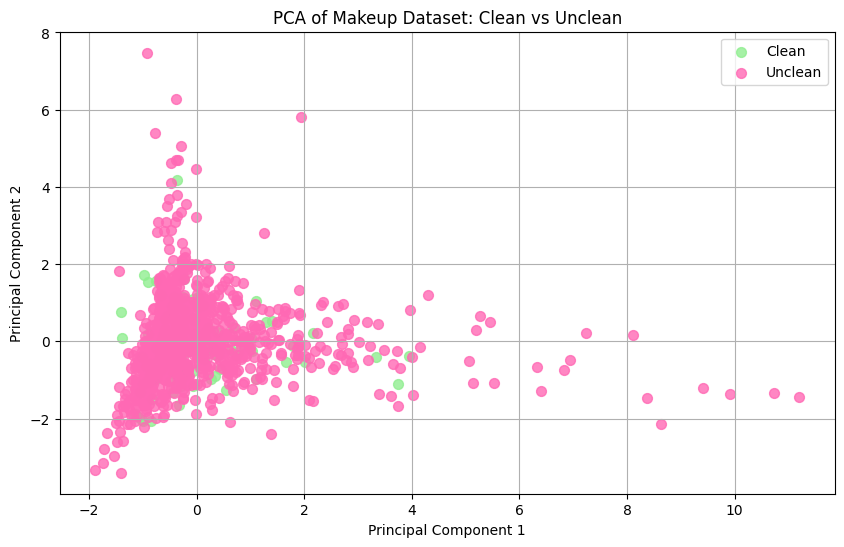

In [81]:
targetsName = ['Clean', 'Unclean']
targets = [1, 0]  # Assuming 1 represents 'Clean' and 0 represents 'Unclean'
colors = ['lightgreen', 'hotpink'] 

# scatter plot visualization
fig, ax = plt.subplots(figsize=(10, 6))

for target, color in zip(targets, colors):
    indicesToKeep = df['is_clean'] == target 
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], 
               pca_df.loc[indicesToKeep, 'PC2'], 
               c=color, s=50, label=targetsName[targets.index(target)], alpha=0.8)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Makeup Dataset: Clean vs Unclean')
ax.legend()
ax.grid()
plt.show()

# 3 component PCA ( all numerical)

In [82]:
# apply PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2','PC3'])

In [83]:
# explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3404509  0.22762701 0.19797848]


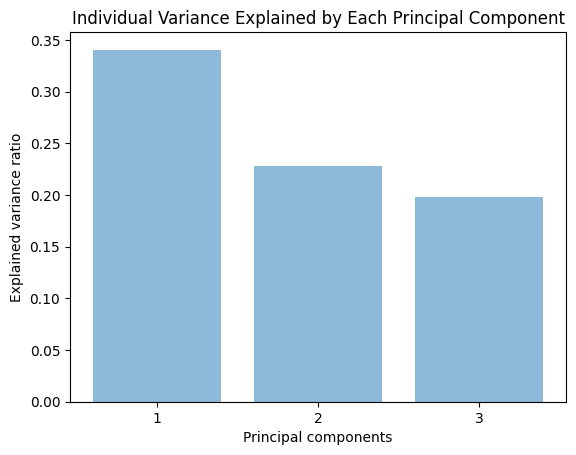

In [84]:
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(False)
plt.show()

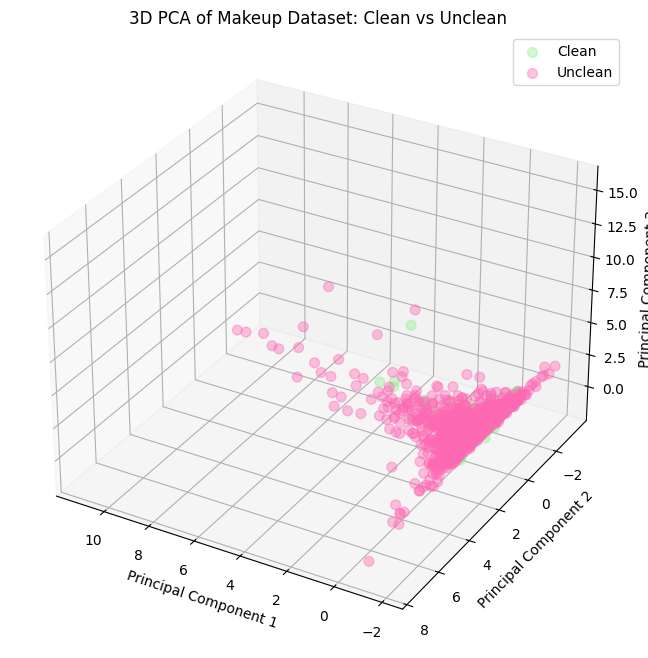

In [85]:
targetsName = ['Clean', 'Unclean']
targets = [1, 0]  # Assuming 1 represents 'Clean' and 0 represents 'Unclean'
colors = ['lightgreen', 'hotpink']  

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    indicesToKeep = df['is_clean'] == target  
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], 
               pca_df.loc[indicesToKeep, 'PC2'], 
               pca_df.loc[indicesToKeep, 'PC3'], 
               c=color, s=50, label=targetsName[targets.index(target)], alpha=0.4)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Makeup Dataset: Clean vs Unclean')
ax.legend()
ax.grid()
ax.view_init(elev=30, azim=120) 
plt.show()

Number of components to retain at least 95% variance: 5
Cumulative variance explained by 5 components: 100.00%


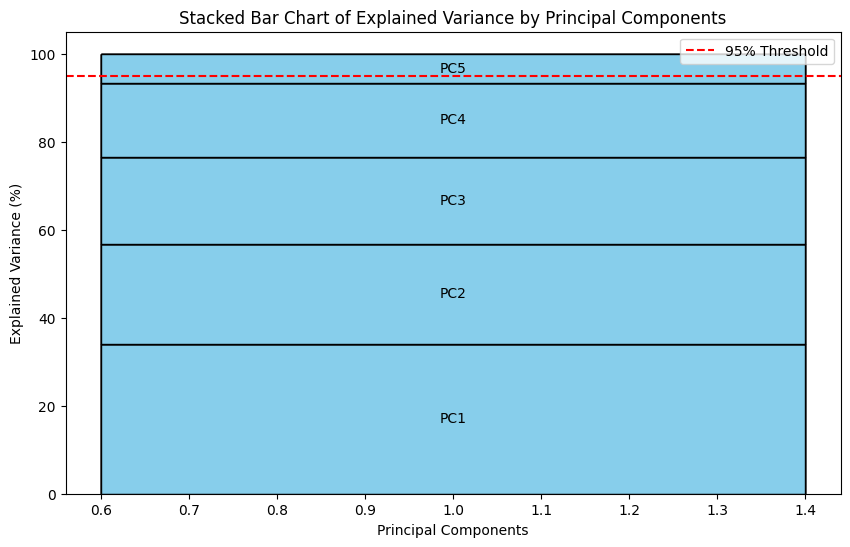

In [86]:
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

# finding the number of components needed to retain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 95) + 1

print(f"Number of components to retain at least 95% variance: {n_components_95}")
print(f"Cumulative variance explained by {n_components_95} components: {cumulative_variance[n_components_95-1]:.2f}%")

plt.figure(figsize=(10, 6))

bottom_height = np.zeros(len(explained_variance_ratio))
for i in range(len(explained_variance_ratio)):
    plt.bar(1, explained_variance_ratio[i] * 100, 
            bottom=bottom_height * 100, 
            color='skyblue', edgecolor='black')
    
    plt.text(1, bottom_height[-1] * 100 + explained_variance_ratio[i] * 100 / 2, 
             f'PC{i+1}', ha='center', va='center', fontsize=10, color='black')
    
    bottom_height += explained_variance_ratio[i]

# horizontal line at 95% threshold
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')

plt.title('Stacked Bar Chart of Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.legend()
plt.grid(False)
plt.show()

In [87]:
top_three_eigenvalues = pca.explained_variance_[:3]
print("Top three eigenvalues:", top_three_eigenvalues)

Top three eigenvalues: [1.70368137 1.13908905 0.99072216]


# Alternatives for Nominal Data:
One-Hot Encoding + PCA: One way to use PCA with nominal data is to first transform the nominal features into numerical form using techniques like one-hot encoding. One-hot encoding converts each category into a binary vector, which can then be input into PCA. However, this approach may increase the dimensionality of the dataset and may not be ideal for many categories.

# Including the catergorial variables

# 2 compononet (including qualitative)

In [88]:
# one-hot encoding for the categorical columns
categorical_columns = ['brand_name','secondary_category','tertiary_category']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# combining numeric and non-numeric columns
df_encoded = df_encoded.drop(columns=['product_name', 'ingredients', 'ingredient_description'])

# performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

In [89]:
# explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.02195107 0.01969425]


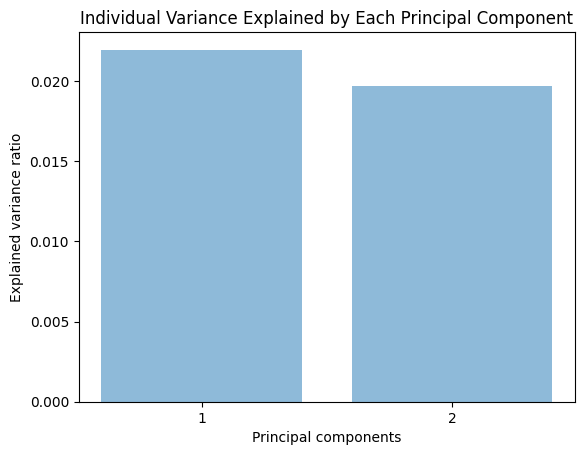

In [90]:
# visual of explained variance
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(False)
plt.show()

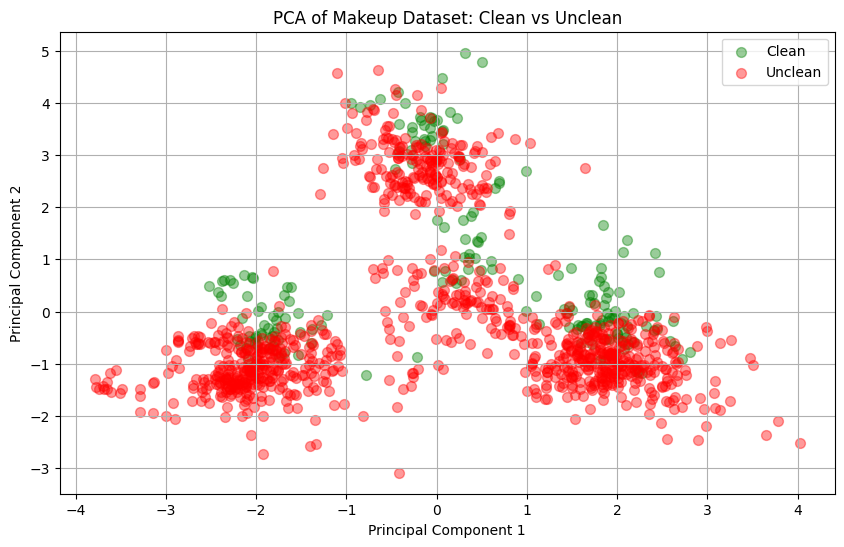

In [91]:
targetsName = ['Clean', 'Unclean']
targets = [1, 0]  # Assuming 1 represents 'Clean' and 0 represents 'Unclean'
colors = ['g', 'r'] 

# scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for target, color in zip(targets, colors):
    indicesToKeep = df['is_clean'] == target  
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], 
               pca_df.loc[indicesToKeep, 'PC2'], 
               c=color, s=50, label=targetsName[targets.index(target)], alpha=0.4)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Makeup Dataset: Clean vs Unclean')
ax.legend()
ax.grid()
plt.show()


# 3 Component (including qualitative)

In [92]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2','PC3'])

In [93]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.0219515  0.01969445 0.01728732]


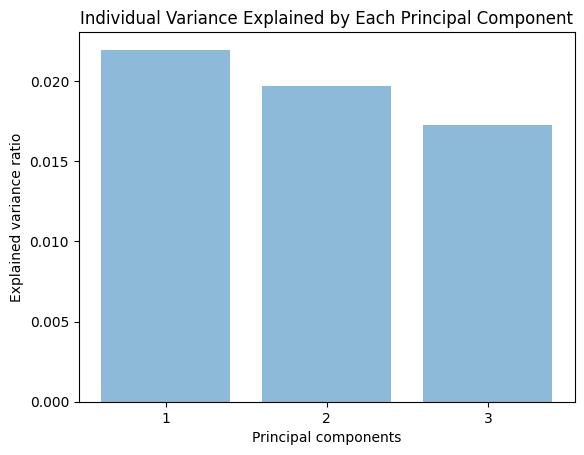

In [94]:
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(False)
plt.show()

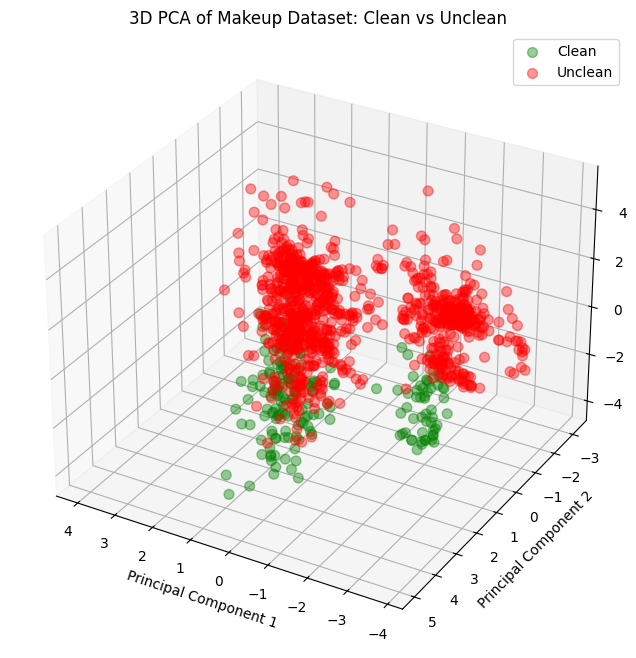

In [95]:
targetsName = ['Clean', 'Unclean']
targets = [1, 0]  # Assuming 1 represents 'Clean' and 0 represents 'Unclean'
colors = ['g', 'r'] 

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    indicesToKeep = df['is_clean'] == target  
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], 
               pca_df.loc[indicesToKeep, 'PC2'], 
               pca_df.loc[indicesToKeep, 'PC3'], 
               c=color, s=50, label=targetsName[targets.index(target)], alpha=0.4)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Makeup Dataset: Clean vs Unclean')
ax.legend()
ax.grid()

ax.view_init(elev=30, azim=120)  

plt.show()

Number of components to retain at least 95% variance: 114
Cumulative variance explained by 114 components: 95.43%


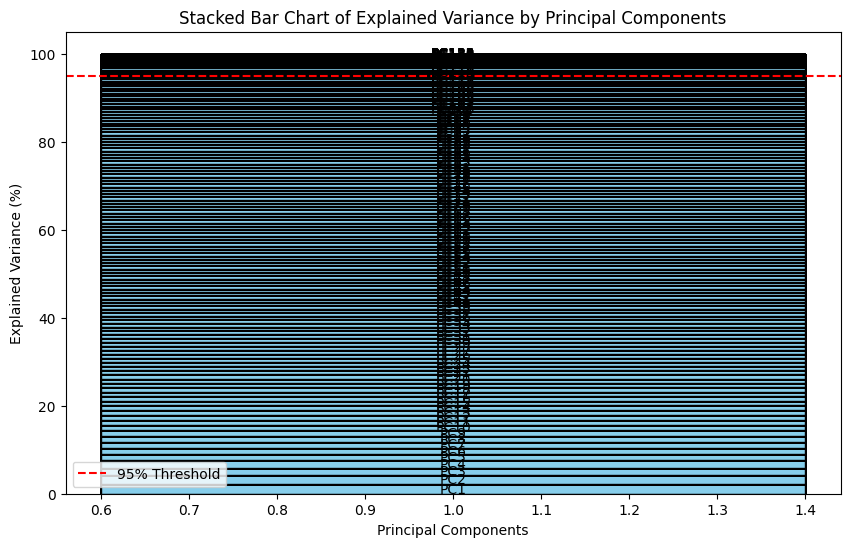

In [96]:
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

# finding the number of components needed to retain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 95) + 1

print(f"Number of components to retain at least 95% variance: {n_components_95}")
print(f"Cumulative variance explained by {n_components_95} components: {cumulative_variance[n_components_95-1]:.2f}%")

plt.figure(figsize=(10, 6))

bottom_height = np.zeros(len(explained_variance_ratio))
for i in range(len(explained_variance_ratio)):
    plt.bar(1, explained_variance_ratio[i] * 100, 
            bottom=bottom_height * 100, 
            color='skyblue', edgecolor='black')
    
    plt.text(1, bottom_height[-1] * 100 + explained_variance_ratio[i] * 100 / 2, 
             f'PC{i+1}', ha='center', va='center', fontsize=10, color='black')
    
    bottom_height += explained_variance_ratio[i]

# horizontal line at 95% threshold
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')

plt.title('Stacked Bar Chart of Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.legend()
plt.grid(False)
plt.show()